In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = sns.load_dataset("diamonds")

# Drop missing values (just in case)
df.dropna(inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 737.15
MSE: 1288705.48
R² Score: 0.9189


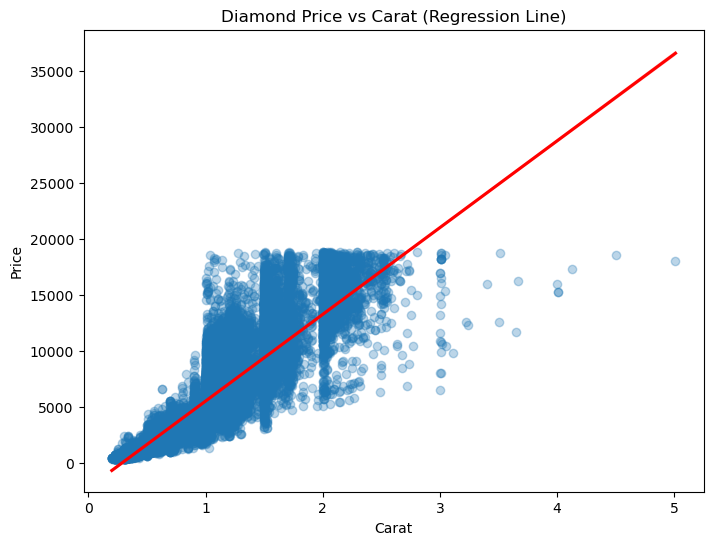

In [10]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='carat', y='price', scatter_kws={'alpha':0.3}, line_kws={"color": "red"})
plt.title("Diamond Price vs Carat (Regression Line)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()
